In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


1. Identifying data structure
    1. Data type of each variable
    2. Summarized values (min, max, average, etc) of each variable


In [15]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [17]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


2. Identifying data distribution

In [18]:
# Separating categorical and numerical variables
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c in data.columns if c not in cat_columns]


# Exception: Even though "products_number", "active_member", "credit_card" are numerical values, these are discontinuous, categorical values.
cat_columns.append(["products_number", "active_member", "credit_card"])

num_columns.remove("customer_id")
num_columns.remove("products_number")
num_columns.remove("active_member")
num_columns.remove("credit_card")

In [19]:
num_col_list = pd.DataFrame(data[num_columns].columns)
num_col_list.isin(['age']).sum()>0

cat_col_list = pd.DataFrame(data[num_columns].columns)

In [23]:
# Custom function that generates distplots for continuous numerical values and count plots for categorical values
def distribution(df, num_col_list, col, ax):
    
    if num_col_list[0].isin([col]).sum() > 0: # if a column is a numerical variable, draw distplot
        sns.distplot(df[col], hist=False, ax=ax)
    else:
        sns.countplot(data = df, x= col, ax=ax) 

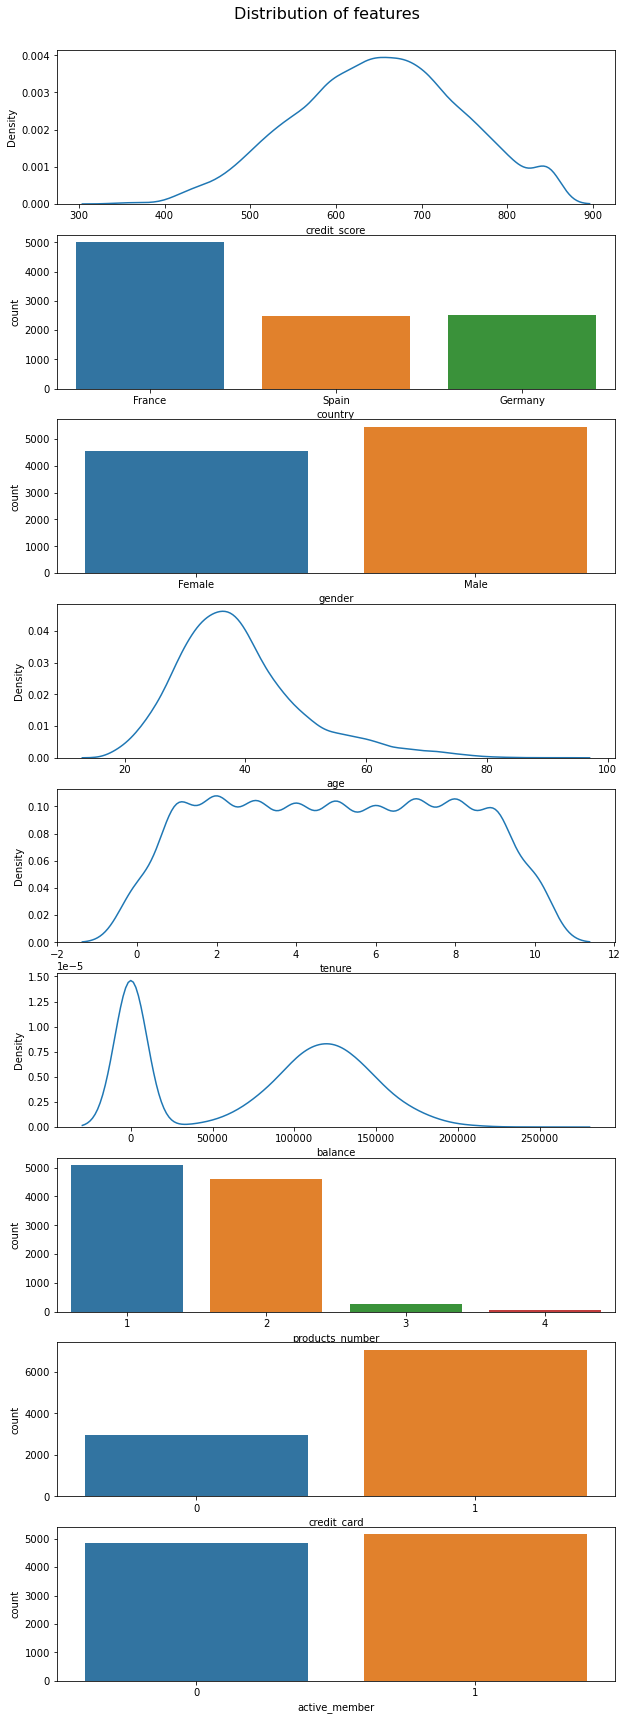

In [24]:

nrow= len(data.columns[1:10])
ncol= 1

fig, ax = plt.subplots(nrow, 1, figsize=(10,30))

fig.suptitle("Distribution of features", fontsize=16, y=0.9)
for i, col in enumerate(data.columns[1:10]): # same with for i, col in list(zip(range(len(columns)), columns)):
    ax[i]= distribution(data, num_col_list, col,ax[i])

4. Identifying missing values

In [25]:
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

3. Exploring relationships between variables with hypotheses
    1. Relationships between the target and features 
        
    2. Relationships between Features

3.1.1. Credit score
- Hypothesis

    Customers with lower credit score would more likely to churn because of more disadvantages such as higher interest rates, higher possibilities of mortgage rejection. (Reference: https://medium.com/@noah.fintech/creating-a-banking-customer-churn-model-1a2d0850f071)

- Results
    1) Customers with lower credit score tended to churn more than who had higher credit score.
    2) Specifically, 100% of customers who had credit score lower than 400 churned out. 






In [37]:
#https://lifewithdata.com/2022/02/26/how-to-create-a-box-plot-in-plotly-python/

churn_0 = data[data['churn'] == 0]
churn_1 = data[data['churn'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=churn_0['credit_score'], name = "didn't churn"))
fig.add_trace(go.Box(x=churn_1['credit_score'], name = "churn"))
fig.update_layout(xaxis_title="credit_score", yaxis_title="churn results")

3.1.2. Gender and Age

- Hypothesis

    There would be no difference in churn rate between gender.
    
- Results 

    Females tended to churn more than males.

- Further analyses with Age to test if there are differences in churn rate between genders when age is considered.


- Results of further analyses

Throughout all age groups, females showed higher churn rate than males, especially in the age group of 50s.
There were overall positive correlation between age group and churn rate; older people tended to churn more than young people, but when it comes to senior citizens with age over 60, their churn rates were not higher than mid-aged groups with 40s-50s. When I divided mid-aged group (40s-50s) and non-mid-aged group, their churn rate showed more drastic difference where mid-aged group tended to churn more.



<AxesSubplot:>

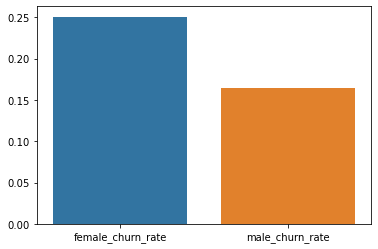

In [38]:
female_churn_rate = data.loc[(data.gender == "Female") & (data.churn ==1)].shape[0] / data.loc[data.gender=="Female"].shape[0]
male_churn_rate = data.loc[(data.gender == "Male") & (data.churn ==1)].shape[0] / data.loc[data.gender=="Male"].shape[0]

gender = ['female_churn_rate','male_churn_rate']
churn_rate = [female_churn_rate, male_churn_rate]

sns.barplot(x=gender, y=churn_rate)

<AxesSubplot:xlabel='age_group', ylabel='churn_rate'>

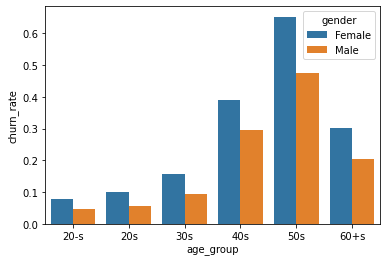

In [62]:
# Further analyses: Test if there are differences in churn rate between genders when age is considered.
age_groups = [0, 20, 30, 40, 50, 60, 100] # considering age distribution, clump ages between 0~ 20 and 60 and 100
age_group_names = ['20-s','20s','30s','40s','50s','60+s']

data['age_group'] = pd.cut(
    data['age'], bins=age_groups, labels=age_group_names)

# churn rate = total number of churned customer/ total number of customer
age_gender = data.groupby(['age_group','gender']).aggregate({'churn':['count','sum']}) # churn count: total number of customers, churn sum: churned customers

#multiindex to single index
age_gender.columns = age_gender.columns.droplevel()
age_gender.reset_index(inplace=True)

age_gender['churn_rate']= age_gender['sum']/age_gender['count']

sns.barplot(x='age_group',y='churn_rate', hue='gender', data=age_gender)

In [ ]:
churn_0 = data[data['churn'] == 0]
churn_1 = data[data['churn'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=churn_0['age'], name = "didn't churn"))
fig.add_trace(go.Box(x=churn_1['age'], name = "churn"))
fig.update_layout(xaxis_title="age", yaxis_title="churn results")

<AxesSubplot:>

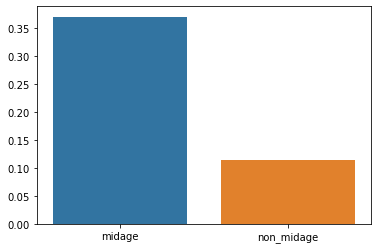

In [109]:
# chrun rate by mid-age (40s-50s) vs non-mid-age (the other age groups)


midage_churn_rate = data.loc[(data.age > 39) & (data.age < 60) & (data.churn ==1)].shape[0] / data.loc[(data.age > 39) & (data.age < 60)].shape[0]
non_midage_churn_rate = data.loc[~((data.age > 39) & (data.age < 60)) & (data.churn ==1)].shape[0] / data.loc[~((data.age > 39) & (data.age < 60))].shape[0]

age = ['midage','non_midage']
churn_rate = [midage_churn_rate,non_midage_churn_rate]

sns.barplot(x=age, y=churn_rate)


3.1.3. Tenure
- Hypothesis

    There would be no difference in churn rate in the number of years of maintaining bank accounts.
    
- Results 
    1) There was no difference in churn rate in tenures


In [102]:
churn_0 = data[data['churn'] == 0]
churn_1 = data[data['churn'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=churn_0['tenure'], name = "didn't churn"))
fig.add_trace(go.Box(x=churn_1['tenure'], name = "churn"))
fig.update_layout(xaxis_title="tenure", yaxis_title="churn results")

3.1.4. Balance
- Hypothesis

   People in poor financial status (low credit score, low balance) would tend to involuntarily stop bank service
    
- Results 
    1) Those who had lower balance tended to stay, while those who had higher balance tended to churn out.



In [ ]:
churn_0 = data[data['churn'] == 0]
churn_1 = data[data['churn'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=churn_0['balance'], name = "didn't churn"))
fig.add_trace(go.Box(x=churn_1['balance'], name = "churn"))
fig.update_layout(xaxis_title="balance", yaxis_title="churn results")

<AxesSubplot:>

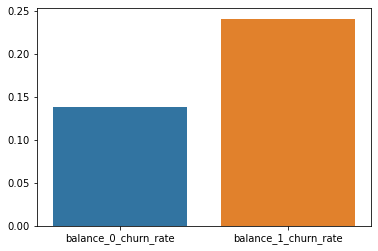

In [104]:


balance_0_churn_rate = data.loc[(data.balance == 0) & (data.churn ==1)].shape[0] / data.loc[(data.balance == 0)].shape[0]
balance_1_churn_rate = data.loc[(data.balance > 0) & (data.churn ==1)].shape[0] / data.loc[(data.balance > 0)].shape[0]

balance_status = ['balance_0_churn_rate','balance_1_churn_rate']
churn_rate = [balance_0_churn_rate,balance_1_churn_rate]

sns.barplot(x=balance_status, y=churn_rate)

3.1.5. Products number
- Hypothesis

  More products number from a bank means more various service options for customer. Therefore, customers will tend to stay as the number of products increases. 
    
- Results 
Contrary to the hypothesis, customer showed higher churn rate for products number with 3 and 4. Specifically. 100% of customers churend when the product number is 4.




<AxesSubplot:>

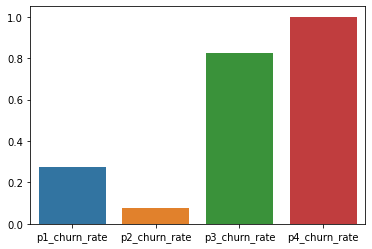

In [65]:
p1_churn_rate = data.loc[(data.products_number == 1) & (data.churn ==1)].shape[0] / data.loc[(data.products_number == 1)].shape[0]
p2_churn_rate = data.loc[(data.products_number == 2) & (data.churn ==1)].shape[0] / data.loc[(data.products_number == 2)].shape[0]
p3_churn_rate = data.loc[(data.products_number == 3) & (data.churn ==1)].shape[0] / data.loc[(data.products_number == 3)].shape[0]
p4_churn_rate = data.loc[(data.products_number == 4) & (data.churn ==1)].shape[0] / data.loc[(data.products_number == 4)].shape[0]

products = ['p1_churn_rate','p2_churn_rate', 'p3_churn_rate', 'p4_churn_rate']
churn_rate = [p1_churn_rate,p2_churn_rate, p3_churn_rate, p4_churn_rate]

sns.barplot(x=products, y=churn_rate)

3.1.6. Credit cards
- Hypothesis
Customers who have credit cards will more likely to churn out becuase they should be interested in other bank credit cards promotions. If they find better credit card benefits from other banks, they will churn out.
  
    
- Results 
There was no difference in churn rate, regardless of possessing credit cards or not.


<AxesSubplot:>

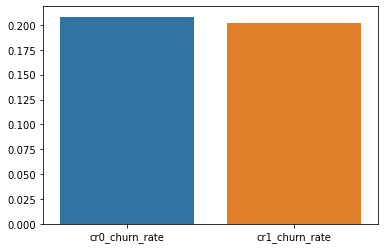

In [66]:
cr1_churn_rate = data.loc[(data.credit_card == 1) & (data.churn ==1)].shape[0] / data.loc[(data.credit_card == 1)].shape[0]
cr0_churn_rate = data.loc[(data.credit_card == 0) & (data.churn ==1)].shape[0] / data.loc[(data.credit_card == 0)].shape[0]

credit_card = ['cr0_churn_rate','cr1_churn_rate']
churn_rate = [cr0_churn_rate,cr1_churn_rate]

sns.barplot(x=credit_card, y=churn_rate)

3.1.7. Active member

- Hypothesis

Active memeber will less likey to churn out than non-active members becuase being an active member suggests the members are satisfied with bank service.
  
    
- Results 

Churn rate of non active member was higer than active memeber, as expected.

<AxesSubplot:>

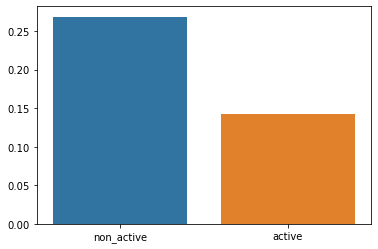

In [68]:
active_churn_rate = data.loc[(data.active_member == 1) & (data.churn ==1)].shape[0] / data.loc[(data.active_member == 1)].shape[0]
non_active_churn_rate = data.loc[(data.active_member == 0) & (data.churn ==1)].shape[0] / data.loc[(data.active_member == 0)].shape[0]

activeness = ['non_active','active']
churn_rate = [non_active_churn_rate,active_churn_rate]

sns.barplot(x=activeness, y=churn_rate)

<AxesSubplot:xlabel='active_member', ylabel='tenure'>

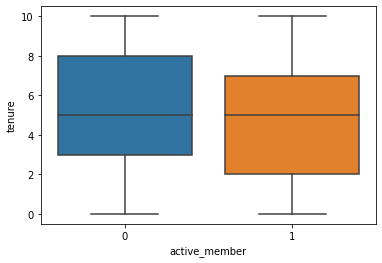

In [75]:
sns.boxplot(x=data.active_member, y= data.tenure)

It does not make sense that balance and estimated salary are not positively correlated
Need to know more about how the salary was estimated. It may raise an issue about the data quality.

<AxesSubplot:xlabel='estimated_salary', ylabel='balance'>

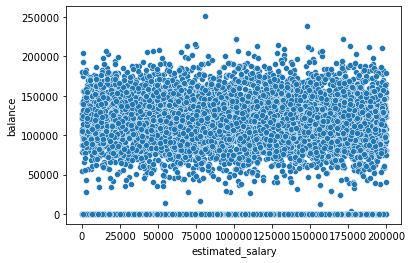

In [106]:

sns.scatterplot(x='estimated_salary', y='balance', data= data)

3.1.8. Estimated Salary
- Hypothesis

Customers with higher salary should have more opportunities to use various types of bank services such as making an account for salary deposit, more transactions to buy products etc, which will result in higher activeness and higher retention rate.
  
    
- Results

Estimated salary was not associated with being an active member and churn rate.



In [98]:

non_active = data[data['active_member'] == 0]
active = data[data['active_member'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=non_active['estimated_salary'], name = "non_active member"))
fig.add_trace(go.Box(x=active['estimated_salary'], name = "active member"))
fig.update_layout(xaxis_title="estimated_salary", yaxis_title="churn results")

In [ ]:
churn_0 = data[data['churn'] == 0]
churn_1 = data[data['churn'] == 1]

fig = go.Figure()
fig.add_trace(go.Box(x=churn_0['estimated_salary'], name = "didn't churn"))
fig.add_trace(go.Box(x=churn_1['estimated_salary'], name = "churn"))
fig.update_layout(xaxis_title="estimated_salary", yaxis_title="churn results")

3.2 Correlation between features 

<AxesSubplot:>

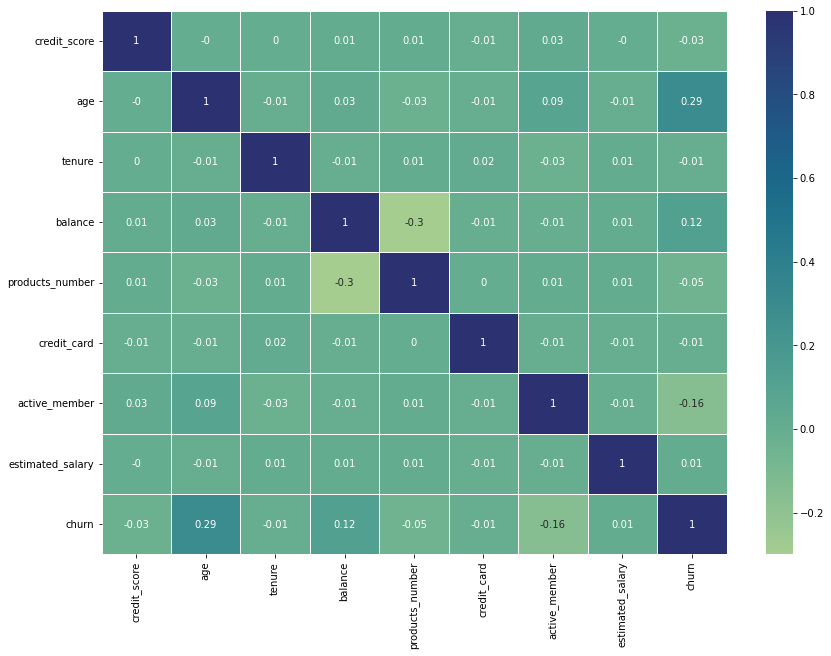

In [107]:
correlation = data.loc[:,data.columns != 'customer_id'].corr().round(2)
plt.figure(figsize = (14,10))
sns.heatmap(correlation, annot = True, cmap='crest', linewidth=.5)

**Conclusion**

For model building, we will mainly consider 6 variables (credit score, age(mid-aged group vs non-mid-aged group),  gender, balance, products number, active memeber) that were relatively highly correlated with churn.

Business insights 

- Credit score
    - From the beginning, not accepting customers with low credit score below 400.
    - Once the bank accepts a customer, bank could provide alerts that can damage credit score.

- Gender and Age
    - Generally, Mid-aged groups would earn highest income, compared to younger or older groups. Hence it would be crucial to motivate mid-aged groups not to quit bank service.
    - Active promotions events for mid-aged women might help lowering thier churn rate.

- Balance 
    - Maintaining customers who have higher balance would be more beneficial to bank management, but it turned out that they are more likey to churn. Therefore, special attention would be necessary to make them stay.

- Products number
    - Keep the number of products simple as 1 or 2.

- Active member
    - Bank may create activeness index and monitor periodically to have more customers active.
To do so, defining 'being an active member' is the very first step.
It can be defined by the amount of balance, the number of transaction during a certain period, number of online access per day, etc.
Depending on the definition, the bank may hold an event to reward customers who increase activeness. 








